# Исследование поведения пользователей мобильного приложения стартапа по продаже продуктов питания

В этом исследовании изучите воронку продаж в мобильном приложении и узнаем, сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах, и на каких именно. Также исследуем результаты A/A/B-эксперимента по изменению шрифтов во всём приложении, и выясним, целесообразно ли поступить так, как советуют дизайнеры.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-о-файле" data-toc-modified-id="Общая-информация-о-файле-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о файле</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Приведем-названия-столбцов-к-нижнему-и-змеиному-регистру" data-toc-modified-id="Приведем-названия-столбцов-к-нижнему-и-змеиному-регистру-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Приведем названия столбцов к нижнему и змеиному регистру</a></span></li><li><span><a href="#Приведем-столбец-event_time-к-более-понятному-значению-времени-и-сохраним-его" data-toc-modified-id="Приведем-столбец-event_time-к-более-понятному-значению-времени-и-сохраним-его-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Приведем столбец event_time к более понятному значению времени и сохраним его</a></span></li><li><span><a href="#Посчитаем-явные-дубликаты" data-toc-modified-id="Посчитаем-явные-дубликаты-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Посчитаем явные дубликаты</a></span></li><li><span><a href="#Удалим-явные-дубликаты-и-сохраним-обновленный-датафрейм" data-toc-modified-id="Удалим-явные-дубликаты-и-сохраним-обновленный-датафрейм-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Удалим явные дубликаты и сохраним обновленный датафрейм</a></span></li><li><span><a href="#Проверим,-что-в-трёх-экспериментальных-групп-нет-пересечений-по-пользователям" data-toc-modified-id="Проверим,-что-в-трёх-экспериментальных-групп-нет-пересечений-по-пользователям-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Проверим, что в трёх экспериментальных групп нет пересечений по пользователям</a></span></li><li><span><a href="#Сохраним-даты-без-времени-в-отдельном-столбце" data-toc-modified-id="Сохраним-даты-без-времени-в-отдельном-столбце-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Сохраним даты без времени в отдельном столбце</a></span></li><li><span><a href="#Посмотрим-на-обновленный-датафрейм" data-toc-modified-id="Посмотрим-на-обновленный-датафрейм-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Посмотрим на обновленный датафрейм</a></span></li><li><span><a href="#Проверим-статистически-разницу-между-двумя-контрольными-группы-для-А/А-эксперимента-(между-выборками-246-и-247)" data-toc-modified-id="Проверим-статистически-разницу-между-двумя-контрольными-группы-для-А/А-эксперимента-(между-выборками-246-и-247)-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Проверим статистически разницу между двумя контрольными группы для А/А-эксперимента (между выборками 246 и 247)</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-сколько-событий-есть-в-логе-и-сколько-из-них-уникальных?" data-toc-modified-id="Посмотрим,-сколько-событий-есть-в-логе-и-сколько-из-них-уникальных?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Посмотрим, сколько событий есть в логе и сколько из них уникальных?</a></span></li><li><span><a href="#Посмотрим,-сколько-всего-пользователей-в-логе-и-сколько-из-них-уникальных?" data-toc-modified-id="Посмотрим,-сколько-всего-пользователей-в-логе-и-сколько-из-них-уникальных?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Посмотрим, сколько всего пользователей в логе и сколько из них уникальных?</a></span></li><li><span><a href="#Посмотрим,-сколько-в-среднем-событий-приходится-на-пользователя?" data-toc-modified-id="Посмотрим,-сколько-в-среднем-событий-приходится-на-пользователя?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Посмотрим, сколько в среднем событий приходится на пользователя?</a></span></li><li><span><a href="#Посмотрим-внимательнее-на-даты-проведения-эксперимента" data-toc-modified-id="Посмотрим-внимательнее-на-даты-проведения-эксперимента-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Посмотрим внимательнее на даты проведения эксперимента</a></span></li><li><span><a href="#Посмотрим,-нормально-ли-распределены-данные-по-датам" data-toc-modified-id="Посмотрим,-нормально-ли-распределены-данные-по-датам-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Посмотрим, нормально ли распределены данные по датам</a></span></li><li><span><a href="#Отбросим-данные-до-01.08.2019" data-toc-modified-id="Отбросим-данные-до-01.08.2019-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Отбросим данные до 01.08.2019</a></span></li><li><span><a href="#Посмотрим-на-обновленный-датафрейм" data-toc-modified-id="Посмотрим-на-обновленный-датафрейм-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Посмотрим на обновленный датафрейм</a></span></li><li><span><a href="#Проверим,-сколько-событий-и-пользователей-утеряно-при-отбросе-старых-данных" data-toc-modified-id="Проверим,-сколько-событий-и-пользователей-утеряно-при-отбросе-старых-данных-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Проверим, сколько событий и пользователей утеряно при отбросе старых данных</a></span></li><li><span><a href="#Проверим,-что-в-датафрейме-есть-пользователи-из-всех-трёх-экспериментальных-групп." data-toc-modified-id="Проверим,-что-в-датафрейме-есть-пользователи-из-всех-трёх-экспериментальных-групп.-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Проверим, что в датафрейме есть пользователи из всех трёх экспериментальных групп.</a></span></li></ul></li><li><span><a href="#Изучим-воронку-событий" data-toc-modified-id="Изучим-воронку-событий-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Изучим воронку событий</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-какие-события-есть-в-логах-и-как-часто-они-встречаются" data-toc-modified-id="Посмотрим,-какие-события-есть-в-логах-и-как-часто-они-встречаются-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Посмотрим, какие события есть в логах и как часто они встречаются</a></span></li><li><span><a href="#Посчитаем,-количество-и-долю-пользователей,-которые-хоть-раз-совершали-событие" data-toc-modified-id="Посчитаем,-количество-и-долю-пользователей,-которые-хоть-раз-совершали-событие-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Посчитаем, количество и долю пользователей, которые хоть раз совершали событие</a></span></li><li><span><a href="#По-воронке-событий-посчитаем,-какая-доля-пользователей-проходит-на-следующий-шаг-воронки-(от-числа-пользователей-на-предыдущем)" data-toc-modified-id="По-воронке-событий-посчитаем,-какая-доля-пользователей-проходит-на-следующий-шаг-воронки-(от-числа-пользователей-на-предыдущем)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем)</a></span></li><li><span><a href="#Посчитаем,-какая-доля-пользователей-доходит-от-первого-события-до-оплаты?" data-toc-modified-id="Посчитаем,-какая-доля-пользователей-доходит-от-первого-события-до-оплаты?-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Посчитаем, какая доля пользователей доходит от первого события до оплаты?</a></span></li></ul></li><li><span><a href="#Изучим-результаты-эксперимента" data-toc-modified-id="Изучим-результаты-эксперимента-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Изучим результаты эксперимента</a></span><ul class="toc-item"><li><span><a href="#Посчитаем,-сколько-пользователей-в-каждой-экспериментальной-группе?" data-toc-modified-id="Посчитаем,-сколько-пользователей-в-каждой-экспериментальной-группе?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Посчитаем, сколько пользователей в каждой экспериментальной группе?</a></span></li><li><span><a href="#Проверим-статистически-разницу-между-двумя-контрольными-группы-для-А/А-эксперимента-(между-выборками-246-и-247)" data-toc-modified-id="Проверим-статистически-разницу-между-двумя-контрольными-группы-для-А/А-эксперимента-(между-выборками-246-и-247)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Проверим статистически разницу между двумя контрольными группы для А/А-эксперимента (между выборками 246 и 247)</a></span></li><li><span><a href="#Определим--самое-популярное-событие-и-посчитаем-число-пользователей,-совершивших-это-событие-в-каждой-из-контрольных-групп-АА-теста" data-toc-modified-id="Определим--самое-популярное-событие-и-посчитаем-число-пользователей,-совершивших-это-событие-в-каждой-из-контрольных-групп-АА-теста-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Определим  самое популярное событие и посчитаем число пользователей, совершивших это событие в каждой из контрольных групп АА-теста</a></span></li><li><span><a href="#Посчитаем-долю-пользователей,-совершивших-каждое-событие,-для-групп-А/А-эксперимента" data-toc-modified-id="Посчитаем-долю-пользователей,-совершивших-каждое-событие,-для-групп-А/А-эксперимента-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Посчитаем долю пользователей, совершивших каждое событие, для групп А/А-эксперимента</a></span></li><li><span><a href="#Проверим,-будет-ли-отличие-между-долями-в-группах-для-А/А-эксперимента-статистически-достоверным" data-toc-modified-id="Проверим,-будет-ли-отличие-между-долями-в-группах-для-А/А-эксперимента-статистически-достоверным-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Проверим, будет ли отличие между долями в группах для А/А-эксперимента статистически достоверным</a></span><ul class="toc-item"><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;MainScreenAppear&quot;-в-группах-246-и-247-А/А-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;MainScreenAppear&quot;-в-группах-246-и-247-А/А-эксперимента,-равные&quot;-с-помощью-z-теста-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "MainScreenAppear" в группах 246 и 247 А/А-эксперимента, равные" с помощью z-теста</a></span></li><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;OffersScreenAppear&quot;-в-группах-246-и-247-А/А-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;OffersScreenAppear&quot;-в-группах-246-и-247-А/А-эксперимента,-равные&quot;-с-помощью-z-теста-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "OffersScreenAppear" в группах 246 и 247 А/А-эксперимента, равные" с помощью z-теста</a></span></li><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;CartScreenAppear&quot;-в-группах-246-и-247-А/А-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;CartScreenAppear&quot;-в-группах-246-и-247-А/А-эксперимента,-равные&quot;-с-помощью-z-теста-5.5.3"><span class="toc-item-num">5.5.3&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "CartScreenAppear" в группах 246 и 247 А/А-эксперимента, равные" с помощью z-теста</a></span></li><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;PaymentScreenSuccessful&quot;-в-группах-246-и-247-А/А-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;PaymentScreenSuccessful&quot;-в-группах-246-и-247-А/А-эксперимента,-равные&quot;-с-помощью-z-теста-5.5.4"><span class="toc-item-num">5.5.4&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "PaymentScreenSuccessful" в группах 246 и 247 А/А-эксперимента, равные" с помощью z-теста</a></span></li><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;Tutorial&quot;-в-группах-246-и-247-А/А-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;Tutorial&quot;-в-группах-246-и-247-А/А-эксперимента,-равные&quot;-с-помощью-z-теста-5.5.5"><span class="toc-item-num">5.5.5&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "Tutorial" в группах 246 и 247 А/А-эксперимента, равные" с помощью z-теста</a></span></li></ul></li><li><span><a href="#Проверим,-будет-ли-отличие-между-долями-в-группах-А/B-эксперимента-статистически-достоверным-для-всех-событий" data-toc-modified-id="Проверим,-будет-ли-отличие-между-долями-в-группах-А/B-эксперимента-статистически-достоверным-для-всех-событий-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Проверим, будет ли отличие между долями в группах А/B-эксперимента статистически достоверным для всех событий</a></span></li><li><span><a href="#Сравните-результаты-с-объединённой-контрольной-группой." data-toc-modified-id="Сравните-результаты-с-объединённой-контрольной-группой.-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Сравните результаты с объединённой контрольной группой.</a></span><ul class="toc-item"><li><span><a href="#Проверим-статистические-различия-между-группами-246-и-248-по-событиям" data-toc-modified-id="Проверим-статистические-различия-между-группами-246-и-248-по-событиям-5.7.1"><span class="toc-item-num">5.7.1&nbsp;&nbsp;</span>Проверим статистические различия между группами 246 и 248 по событиям</a></span><ul class="toc-item"><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;MainScreenAppear&quot;-в-группах-246-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;MainScreenAppear&quot;-в-группах-246-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста-5.7.1.1"><span class="toc-item-num">5.7.1.1&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "MainScreenAppear" в группах 246 и 248 А/B-эксперимента, равные" с помощью z-теста</a></span></li><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;OffersScreenAppear&quot;-в-группах-246-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;OffersScreenAppear&quot;-в-группах-246-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста-5.7.1.2"><span class="toc-item-num">5.7.1.2&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "OffersScreenAppear" в группах 246 и 248 А/B-эксперимента, равные" с помощью z-теста</a></span></li><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;CartScreenAppear&quot;-в-группах-246-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;CartScreenAppear&quot;-в-группах-246-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста-5.7.1.3"><span class="toc-item-num">5.7.1.3&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "CartScreenAppear" в группах 246 и 248 А/B-эксперимента, равные" с помощью z-теста</a></span></li><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;PaymentScreenSuccessful&quot;-в-группах-246-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;PaymentScreenSuccessful&quot;-в-группах-246-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста-5.7.1.4"><span class="toc-item-num">5.7.1.4&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "PaymentScreenSuccessful" в группах 246 и 248 А/B-эксперимента, равные" с помощью z-теста</a></span></li><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;Tutorial&quot;-в-группах-246-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;Tutorial&quot;-в-группах-246-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста-5.7.1.5"><span class="toc-item-num">5.7.1.5&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "Tutorial" в группах 246 и 248 А/B-эксперимента, равные" с помощью z-теста</a></span></li></ul></li><li><span><a href="#Проверим-статистические-различия-между-группами-247-и-248-по-событиям" data-toc-modified-id="Проверим-статистические-различия-между-группами-247-и-248-по-событиям-5.7.2"><span class="toc-item-num">5.7.2&nbsp;&nbsp;</span>Проверим статистические различия между группами 247 и 248 по событиям</a></span><ul class="toc-item"><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;MainScreenAppear&quot;-в-группах-247-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;MainScreenAppear&quot;-в-группах-247-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста-5.7.2.1"><span class="toc-item-num">5.7.2.1&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "MainScreenAppear" в группах 247 и 248 А/B-эксперимента, равные" с помощью z-теста</a></span></li><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;OffersScreenAppear&quot;-в-группах-247-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;OffersScreenAppear&quot;-в-группах-247-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста-5.7.2.2"><span class="toc-item-num">5.7.2.2&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "OffersScreenAppear" в группах 247 и 248 А/B-эксперимента, равные" с помощью z-теста</a></span></li><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;CartScreenAppear&quot;-в-группах-247-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;CartScreenAppear&quot;-в-группах-247-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста-5.7.2.3"><span class="toc-item-num">5.7.2.3&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "CartScreenAppear" в группах 247 и 248 А/B-эксперимента, равные" с помощью z-теста</a></span></li><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;PaymentScreenSuccessful&quot;-в-группах-247-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;PaymentScreenSuccessful&quot;-в-группах-247-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста-5.7.2.4"><span class="toc-item-num">5.7.2.4&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "PaymentScreenSuccessful" в группах 247 и 248 А/B-эксперимента, равные" с помощью z-теста</a></span></li><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;Tutorial&quot;-в-группах-247-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;Tutorial&quot;-в-группах-247-и-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста-5.7.2.5"><span class="toc-item-num">5.7.2.5&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "Tutorial" в группах 247 и 248 А/B-эксперимента, равные" с помощью z-теста</a></span></li></ul></li><li><span><a href="#Проверим-статистически-разницу-между-объединённой-контрольной-группой-А/А-эксперимента-и-экспериментальной-группой-А/В-эксперимента-по-событиям" data-toc-modified-id="Проверим-статистически-разницу-между-объединённой-контрольной-группой-А/А-эксперимента-и-экспериментальной-группой-А/В-эксперимента-по-событиям-5.7.3"><span class="toc-item-num">5.7.3&nbsp;&nbsp;</span>Проверим статистически разницу между объединённой контрольной группой А/А-эксперимента и экспериментальной группой А/В-эксперимента по событиям</a></span><ul class="toc-item"><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;MainScreenAppear&quot;-в-объединенной-контрольной-группе-246-и-247-А/А-эксперимента-и-группы-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;MainScreenAppear&quot;-в-объединенной-контрольной-группе-246-и-247-А/А-эксперимента-и-группы-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста-5.7.3.1"><span class="toc-item-num">5.7.3.1&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "MainScreenAppear" в объединенной контрольной группе 246 и 247 А/А-эксперимента и группы 248 А/B-эксперимента, равные" с помощью z-теста</a></span></li><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;OffersScreenAppear&quot;-в-объединенной-контрольной-группе-246-и-247-А/А-эксперимента-и-группы-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;OffersScreenAppear&quot;-в-объединенной-контрольной-группе-246-и-247-А/А-эксперимента-и-группы-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста-5.7.3.2"><span class="toc-item-num">5.7.3.2&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "OffersScreenAppear" в объединенной контрольной группе 246 и 247 А/А-эксперимента и группы 248 А/B-эксперимента, равные" с помощью z-теста</a></span></li><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;CartScreenAppear&quot;-в-объединенной-контрольной-группе-246-и-247-А/А-эксперимента-и-группы-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;CartScreenAppear&quot;-в-объединенной-контрольной-группе-246-и-247-А/А-эксперимента-и-группы-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста-5.7.3.3"><span class="toc-item-num">5.7.3.3&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "CartScreenAppear" в объединенной контрольной группе 246 и 247 А/А-эксперимента и группы 248 А/B-эксперимента, равные" с помощью z-теста</a></span></li><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;PaymentScreenSuccessful&quot;-в-объединенной-контрольной-группе-246-и-247-А/А-эксперимента-и-группы-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;PaymentScreenSuccessful&quot;-в-объединенной-контрольной-группе-246-и-247-А/А-эксперимента-и-группы-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста-5.7.3.4"><span class="toc-item-num">5.7.3.4&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "PaymentScreenSuccessful" в объединенной контрольной группе 246 и 247 А/А-эксперимента и группы 248 А/B-эксперимента, равные" с помощью z-теста</a></span></li><li><span><a href="#Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;Tutorial&quot;-в-объединенной-контрольной-группе-246-и-247-А/А-эксперимента-и-группы-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста" data-toc-modified-id="Проверим-гипотезу-&quot;Доли-пользователей,-совершивших-событие-&quot;Tutorial&quot;-в-объединенной-контрольной-группе-246-и-247-А/А-эксперимента-и-группы-248-А/B-эксперимента,-равные&quot;-с-помощью-z-теста-5.7.3.5"><span class="toc-item-num">5.7.3.5&nbsp;&nbsp;</span>Проверим гипотезу "Доли пользователей, совершивших событие "Tutorial" в объединенной контрольной группе 246 и 247 А/А-эксперимента и группы 248 А/B-эксперимента, равные" с помощью z-теста</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

In [1]:
#подключим нужные библиотеки
import pandas as pd
import scipy.stats as st
from statsmodels. stats.weightstats import ztest as ztest
import datetime as dt
import numpy as np
import math as mth
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import plotly.express as px
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

## Общая информация о файле

In [2]:
data = pd.read_csv('/datasets/logs_exp.csv', sep = '\t')

In [3]:
data.info() #информация о датафрейме
data.head(5) #информация о первых 5 строках датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


В загруженном датафрейме имеются 4 столбца с данными, которые содержат следующее:

- EventName — название события; 
- DeviceIDHash — уникальный идентификатор пользователя; 
- EventTimestamp — время события; 
- ExpId — номер эксперимента. 

Также выявлено, что:

- названия столбцов не соответствуют змеиному регистру, 
- в столбце EventTimestamp тип данных int64 вместо datetime64,
- пропуски в данных отсутствуют.

## Предобработка данных

### Приведем названия столбцов к нижнему и змеиному регистру

In [4]:
data.rename(columns = {'EventName':'event_name', 'DeviceIDHash':'user_id', 'EventTimestamp':'event_time', 'ExpId':'exp_id'},\
            inplace = True)

### Приведем столбец event_time к более понятному значению времени и сохраним его

In [5]:
data['event_time'] = pd.to_datetime(data['event_time'], unit='s')

### Посчитаем явные дубликаты

In [6]:
data.duplicated().sum()

413

Выявлено 413 полных дубликатов. Рекомендуется их удалить.

### Удалим явные дубликаты и сохраним обновленный датафрейм

In [7]:
data = data.drop_duplicates()

### Проверим, что в трёх экспериментальных групп нет пересечений по пользователям

In [8]:
data.pivot_table(index='exp_id', values='user_id', aggfunc='nunique')

,user_id
exp_id,
246,2489
247,2520
248,2542


In [9]:
#выделим уникальных пользователей контрольных групп в отдельные переменные по каждой группе
data_246 = data[data['exp_id']==246]
data_246 = data_246['user_id'].unique()
data_247 = data[data['exp_id']==247]
data_247 = data_247['user_id'].unique()
data_248 = data[data['exp_id']==248]
data_248 = data_248['user_id'].unique()

In [10]:
#проверим с помощью цикла есть ли пользователи, попавшие одновременно в несколько групп
crossing_users = []
for i in data_246:
    if i in crossing_users:
        for j in data_247:
            if i == j:
                crossing_users.append(i)
for i in data_246:
    if i in crossing_users:
        for j in data_247:
            if i == j:
                crossing_users.append(i)
crossing_users

[]

В датафрейме присутствуют пользователи во всех трех группах, ошибки при логировании и распределении пользователей по группам отсутствуют.

### Сохраним даты без времени в отдельном столбце

In [11]:
data['date'] = pd.to_datetime(data['event_time']).dt.normalize()

### Посмотрим на обновленный датафрейм

In [12]:
data.info() #информация о датафрейме
data.head(5) #информация о первых 5 строках датафрейма

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  243713 non-null  object        
 1   user_id     243713 non-null  int64         
 2   event_time  243713 non-null  datetime64[ns]
 3   exp_id      243713 non-null  int64         
 4   date        243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 11.2+ MB


,event_name,user_id,event_time,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


Итак, данные готовы к дальнейшему анализу

### Проверим статистически разницу между двумя контрольными группы для А/А-эксперимента (между выборками 246 и 247)
Проверим гипотезу "Выборки с данными 246 и 247 А/А-эксперимента равные" с помощью z-теста 

H_0: Данные в выборке 246 = данные в выборке 247.

H_a: Данные в выборке 246 ≠ данные в выборке 247.

Критический уровень статистической значимости = 0.05 

## Исследовательский анализ данных

### Посмотрим, сколько событий есть в логе и сколько из них уникальных?

In [13]:
print('Количество событий в логе: ', data['event_name'].count())
#посмотрим на количество уникальные значений в столбце event_name
print('Из них: количество уникальных событий в логе составляет', data['event_name'].value_counts().count())

Количество событий в логе:  243713
Из них: количество уникальных событий в логе составляет 5


### Посмотрим, сколько всего пользователей в логе и сколько из них уникальных?

In [14]:
print('Количество пользователей в логе: ', data['user_id'].count())
#посмотрим на количество уникальные значений в столбце user_id
print('Из них: количество уникальных пользователей в логе составляет', data['user_id'].value_counts().count())

Количество пользователей в логе:  243713
Из них: количество уникальных пользователей в логе составляет 7551


### Посмотрим, сколько в среднем событий приходится на пользователя?

In [15]:
# находим количество событий и количество пользователей
event_per_user = data.groupby('event_name').agg(
    {'user_id': ['count', 'nunique']}
)

# переименовываем колонки
event_per_user.columns = ['n_events', 'n_users']

# делим число событий на количество пользователей
event_per_user['event_per_user'] = (
    event_per_user['n_events'] / event_per_user['n_users']
)

print(event_per_user.sort_values(by='event_per_user', ascending=False)) 

                         n_events  n_users  event_per_user
event_name                                                
MainScreenAppear           119101     7439       16.010351
CartScreenAppear            42668     3749       11.381168
OffersScreenAppear          46808     4613       10.146976
PaymentScreenSuccessful     34118     3547        9.618833
Tutorial                     1018      847        1.201889


Таким образом, в-среднем, примерно 16 MainScreenAppear, 11 CartScreenAppear, 10 OffersScreenAppear, 9 PaymentScreenSuccessful и 1 Tutorial приходится на одного пользователя.

### Посмотрим внимательнее на даты проведения эксперимента

In [16]:
print('Минимальная дата в логе:', data['date'].min())
print('Максимальная дата в логе:', data['date'].max())

Минимальная дата в логе: 2019-07-25 00:00:00
Максимальная дата в логе: 2019-08-07 00:00:00


### Посмотрим, нормально ли распределены данные по датам

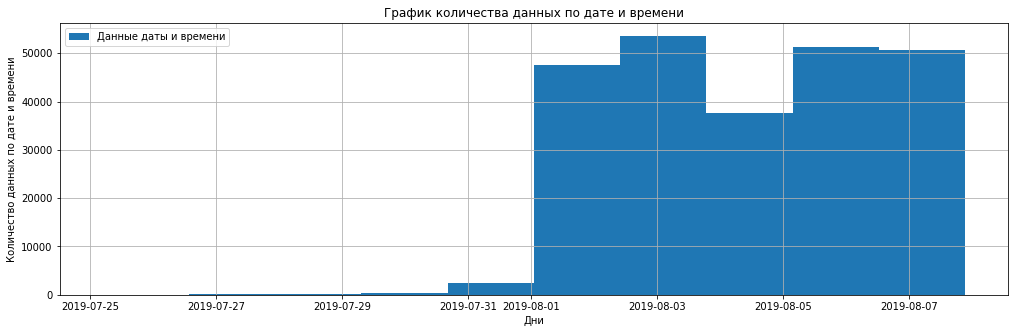

In [17]:
#Построим гистограмму по дате и времени
plt.figure(figsize=(17,5))
plt.hist(data['event_time'], label= 'Данные даты и времени');
plt.title('График количества данных по дате и времени')
plt.xlabel("Дни")
plt.ylabel("Количество данных по дате и времени")
plt.legend(loc=2);
plt.grid(True)
#plt.contains(8)
plt.show();

Итак, согласно графику количество данных до даты 1.08.2019 сильно меньше. Это происходит из-за того, что технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Отбросим данные до 01.08.2019.

### Отбросим данные до 01.08.2019

In [18]:
data_new = data.loc[data['date'] >= '2019.08.1']

### Посмотрим на обновленный датафрейм

In [19]:
data_new.info()
data_new.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240887 entries, 2828 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  240887 non-null  object        
 1   user_id     240887 non-null  int64         
 2   event_time  240887 non-null  datetime64[ns]
 3   exp_id      240887 non-null  int64         
 4   date        240887 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 11.0+ MB


,event_name,user_id,event_time,exp_id,date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01


### Проверим, сколько событий и пользователей утеряно при отбросе старых данных

In [20]:
round(((data['event_name'].count() - data_new['event_name'].count())/data['event_name'].count()*100), 3)

1.16

In [21]:
round(((data['user_id'].value_counts().count() - data_new['user_id'].value_counts().count())/\
      data['user_id'].value_counts().count()*100), 3)

0.225

Таким образом, мы отбросили всего 1,16% событий и 0,225% уникальных пользователей.

### Проверим, что в датафрейме есть пользователи из всех трёх экспериментальных групп.

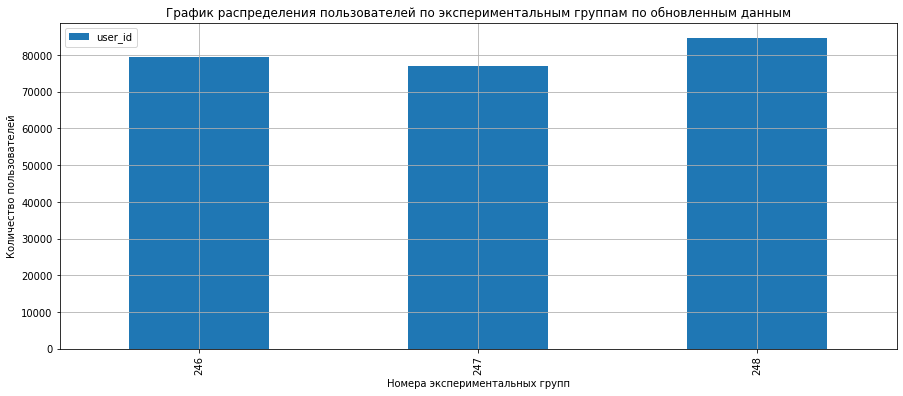

In [22]:
data_new.pivot_table(index='exp_id', values='user_id', aggfunc='count').plot(kind = 'bar', figsize=(15,6), grid=True);
plt.title('График распределения пользователей по экспериментальным группам по обновленным данным')
plt.xlabel("Номера экспериментальных групп")
plt.ylabel("Количество пользователей")
plt.show();

Пользователи присутствуют во всех трех группах.

Подытожим:
1. Эксперимент проводился с 01.08.2019 по 07.08.2019. 
2. Всего 5 уникальных событий в логе.
3. Есть 3 группы, из которых 246 и 247 - это группы с результатами А/А-тестирования, а 248 - это экспериментальная группа для А/В-тестирования.

## Изучим воронку событий

### Посмотрим, какие события есть в логах и как часто они встречаются

In [23]:
data_new.groupby('event_name').agg({'user_id': 'count'}).sort_values(by='user_id', ascending=False)

,user_id
event_name,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


Самое популярное событие: MainScreenAppear (посещение главного экрана), а самое редкое - Tutorial (посещение руководства пользователя).

### Посчитаем, количество и долю пользователей, которые хоть раз совершали событие

In [24]:
user_per_event = data_new.groupby('event_name').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)

user_per_event['share'] = round((user_per_event['user_id'] / (data_new['user_id'].value_counts().count())*100), 2)

user_per_event

,user_id,share
event_name,,
MainScreenAppear,7419,98.47
OffersScreenAppear,4593,60.96
CartScreenAppear,3734,49.56
PaymentScreenSuccessful,3539,46.97
Tutorial,840,11.15


7 419 (98.47%) уникальных пользователей посетили главный экран (событие MainScreenAppear), 

4 593 (60.96%) уникальных пользователей зашли в Предложения (событие OffersScreenAppear),

3 734 (49.56%) уникальных пользователей перешли в корзину (событие CartScreenAppear),

3 539 (46.97%) уникальных пользователей оплатили положенный в корзину товар (событие PaymentScreenSuccessful),

840 (11.15%) уникальных пользователей обратились к руководству пользователя (событие Tutorial).

Около 1,5% пользователей миновали главный экран, таким образом, есть вероятность технических ошибок, при которых главный экран не подгрузился.

Вероятнее всего, события происходят следующим образом:
1. Пользователя, заходя в приложение, видит главный экран (событие MainScreenAppear).
2. На Главном экране находятся иконки с продуктами питания, на которые пользователь нажимает, чтобы ознакомиться подробнее (событие OffersScreenAppear).
3. Далее пользователь отправляет в корзину понравившийся товар и переходит в корзину (событие CartScreenAppear).
4. Далее пользователь оплачивает положенный в корзину товар (событие PaymentScreenSuccessful).
5. Если пользователь сталкивается с затруднениями на каком-то шаге, то он отправляется читать руководство пользователя (событие Tutorial).

Таким образом, последний шаг к воронке продаж не относится, так как скорее знак, что для некоторых пользователей возможны неудобства в приложении. Однако таких пользователей немного, поэтому ими можно пренебречь.

### По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем)

In [25]:
#отбросим данные по событию Tutorial
users_funnel = user_per_event[:-1]

users_funnel = round((users_funnel/users_funnel.shift()*100), 2)[1:]

users_funnel.reset_index().drop(labels = ['share'],axis = 1)

,event_name,user_id
0,OffersScreenAppear,61.91
1,CartScreenAppear,81.30
2,PaymentScreenSuccessful,94.78


Ко 2 шагу переходит 61,91% пользователей, к третьему - 81,3%, а к четвертому шагу - 94,78%.

Таким образом, больше всего пользователей уходит после первого шага.

### Посчитаем, какая доля пользователей доходит от первого события до оплаты?

In [26]:
user_per_event = user_per_event.reset_index().drop(labels = [1,2,4],axis = 0).drop(labels = ['share'],axis = 1)

print(round((user_per_event['user_id']/user_per_event['user_id'].shift()*100), 2))

0     NaN
3    47.7
Name: user_id, dtype: float64


Конверсия в приложении составляет 47,7%. 

Итак, отметим важное:
1. Из  событий к воронке продаж относятся 4 (MainScreenAppear, OffersScreenAppear, CartScreenAppear и PaymentScreenSuccessful).
2. Больше всего пользователей уходит после первого шага.
3. Конверсия в приложении составляет 47,7%. 

## Изучим результаты эксперимента

### Посчитаем, сколько пользователей в каждой экспериментальной группе?

In [27]:
data_new.pivot_table(index='exp_id', values='user_id', aggfunc='count')

,user_id
exp_id,
246,79302
247,77022
248,84563


В группе 246 находится 79302 пользователя, в группе 247 находится 77022 пользователя, а в группе 248 больше всего пользователей: 84563.

Поскольку в контрольных группах для А/А-эксперимента (выборки 246 и 247) присутствует разное количество пользователей (разница составляет почти 3%), то следует проверить статистически равность выборок для корректного определения результатов эксперимента.

### Проверим статистически разницу между двумя контрольными группы для А/А-эксперимента (между выборками 246 и 247)
Проверим гипотезу "Выборки с данными 246 и 247 А/А-эксперимента равные" с помощью z-теста 

H_0: Данные в выборке 246 = данные в выборке 247.

H_a: Данные в выборке 246 ≠ данные в выборке 247.

Критический уровень статистической значимости = 0.05 

In [28]:
#выделим пользователей контрольных групп в отдельные переменные
data_new_246 = data_new[data_new['exp_id']==246]
data_new_247 = data_new[data_new['exp_id']==247]
data_new_248 = data_new[data_new['exp_id']==248]

In [29]:
#посмотрим сколько пользователей было на каждом событии в каждой группе
data_new_246_g = data_new_246.groupby('event_name')\
.agg({'user_id': 'count'})\
.sort_values(by='user_id', ascending=False)\
.reset_index()

data_new_247_g = data_new_247.groupby('event_name')\
.agg({'user_id': 'count'})\
.sort_values(by='user_id', ascending=False)\
.reset_index()

In [30]:
#выделим значения столбца user_id в отдельную переменную
a_246 = data_new_246_g['user_id']

a_247 = data_new_247_g['user_id']

format(ztest(a_246, a_247, value= 0))

'(0.05159147288505236, 0.9588542139449071)'

Статистика теста для двух выборочных z-тестов составляет 0,05 , а соответствующее значение p равно 0,959.

Поскольку это p-значение больше 0,05, у нас нет достаточных доказательств, чтобы отклонить нулевую гипотезу, поэтому данные в выборках равны статистически.

### Определим  самое популярное событие и посчитаем число пользователей, совершивших это событие в каждой из контрольных групп АА-теста

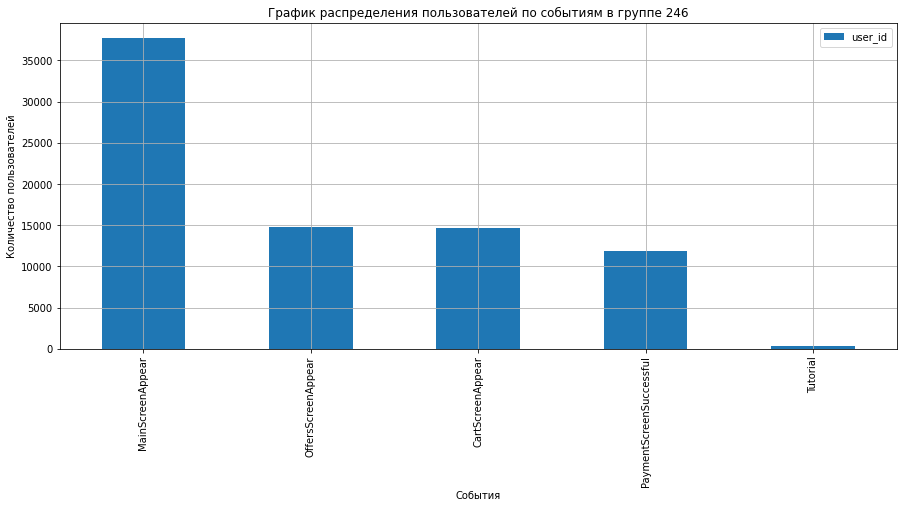

In [31]:
data_new_246_g.set_index('event_name').plot(kind = 'bar', figsize=(15,6), grid=True);
plt.title('График распределения пользователей по событиям в группе 246')
plt.xlabel("События")
plt.ylabel("Количество пользователей")
plt.show();

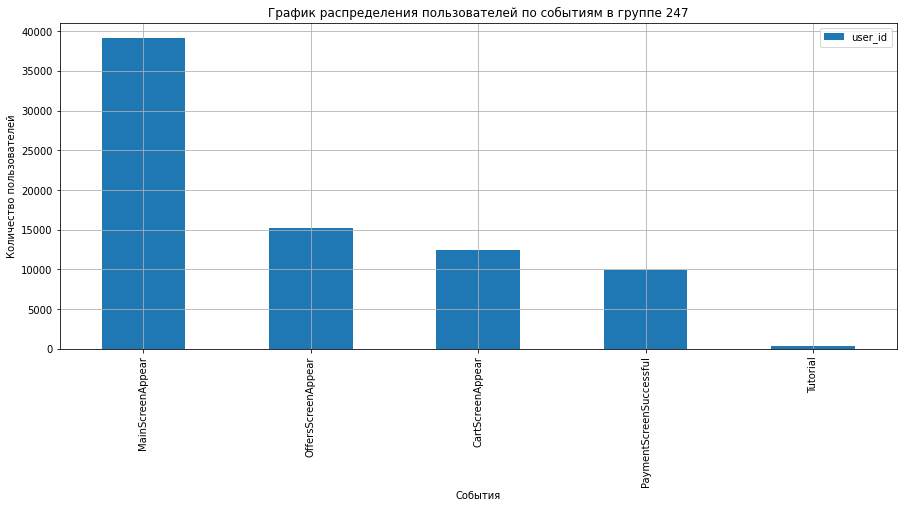

In [32]:
data_new_247_g.set_index('event_name').plot(kind = 'bar', figsize=(15,6), grid=True);
plt.title('График распределения пользователей по событиям в группе 247')
plt.xlabel("События")
plt.ylabel("Количество пользователей")
plt.show();

Самое популярное событие в обеих выборках является MainScreenAppear, а наименее популярное - Tutorial.

### Посчитаем долю пользователей, совершивших каждое событие, для групп А/А-эксперимента

In [33]:
#Посчитаем долю пользователей, совершивших каждое из этих событий в группе 246
data_new_246_g['share'] = round((data_new_246_g['user_id']/data_new_246_g['user_id'].sum())*100, 2)
data_new_246_g

,event_name,user_id,share
0,MainScreenAppear,37676,47.51
1,OffersScreenAppear,14767,18.62
2,CartScreenAppear,14690,18.52
3,PaymentScreenSuccessful,11852,14.95
4,Tutorial,317,0.40


In [34]:
#Посчитаем долю пользователей, совершивших каждое из этих событий в группе 247
data_new_247_g['share'] = round((data_new_247_g['user_id']/data_new_247_g['user_id'].sum())*100, 2)
data_new_247_g

,event_name,user_id,share
0,MainScreenAppear,39090,50.75
1,OffersScreenAppear,15179,19.71
2,CartScreenAppear,12434,16.14
3,PaymentScreenSuccessful,9981,12.96
4,Tutorial,338,0.44


### Проверим, будет ли отличие между долями в группах для А/А-эксперимента статистически достоверным

In [35]:
#напишем функцию, которая посчитает статистические различия между группами по событиям
def z_test(g, e):
    groups = np.array(g)
    events = np.array(e)

    # пропорция успехов в первой группе:
    p1 = groups[0]/events[0]

    # пропорция успехов во второй группе:
    p2 = groups[1]/events[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (groups[0] + groups[1]) / (events[0] + events[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/events[0] + 1/events[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2    
    
    # критический уровень статистической значимости
    alpha = .05 # критический уровень статистической значимости
    
    print('p-значение: ', p_value)
    if p_value < alpha:
            print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
            print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
def test(event, group_1, group_2):
    events = data_new.loc[(data_new['event_name'] == event)&(data_new['exp_id'].isin([group_1, group_2]))]\
    .groupby('exp_id')\
    .agg({'user_id':'nunique'})
    events.columns = ['users_per_event']
    events['user_total'] = data_new.groupby('exp_id').agg({'user_id':'nunique'})
    events['share'] = round((events['users_per_event']/events['user_total'].sum())*100, 2)
    g = events['users_per_event']
    e = events['user_total']
    z_test(g,e)

#### Проверим гипотезу "Доли пользователей, совершивших событие "MainScreenAppear" в группах 246 и 247 А/А-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "MainScreenAppear" в группе 246 = доля пользователей, совершивших событие "MainScreenAppear" в группе 247.

H_a: Доля пользователей, совершивших событие "MainScreenAppear" в группе 246 ≠ доля пользователей, совершивших событие "MainScreenAppear" в группе 247.

Критический уровень статистической значимости = 0.05 

In [36]:
event='MainScreenAppear'
group_1 = 246
group_2 = 247
test(event, group_1, group_2)

p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


#### Проверим гипотезу "Доли пользователей, совершивших событие "OffersScreenAppear" в группах 246 и 247 А/А-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "OffersScreenAppear" в группе 246 = доля пользователей, совершивших событие "OffersScreenAppear" в группе 247.

H_a: Доля пользователей, совершивших событие "OffersScreenAppear" в группе 246 ≠ доля пользователей, совершивших событие "OffersScreenAppear" в группе 247.

Критический уровень статистической значимости = 0.05 

In [37]:
event='OffersScreenAppear'
group_1 = 246
group_2 = 247
test(event, group_1, group_2)

p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


####  Проверим гипотезу "Доли пользователей, совершивших событие "CartScreenAppear" в группах 246 и 247 А/А-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "CartScreenAppear" в группе 246 = доля пользователей, совершивших событие "CartScreenAppear" в группе 247.

H_a: Доля пользователей, совершивших событие "CartScreenAppear" в группе 246 ≠ доля пользователей, совершивших событие "CartScreenAppear" в группе 247.

Критический уровень статистической значимости = 0.05 

In [38]:
event='CartScreenAppear'
group_1 = 246
group_2 = 247
test(event, group_1, group_2)

p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


####  Проверим гипотезу "Доли пользователей, совершивших событие "PaymentScreenSuccessful" в группах 246 и 247 А/А-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "PaymentScreenSuccessful" в группе 246 = доля пользователей, совершивших событие "PaymentScreenSuccessful" в группе 247.

H_a: Доля пользователей, совершивших событие "PaymentScreenSuccessful" в группе 246 ≠ доля пользователей, совершивших событие "PaymentScreenSuccessful" в группе 247.

Критический уровень статистической значимости = 0.05

In [39]:
event='PaymentScreenSuccessful'
group_1 = 246
group_2 = 247
test(event, group_1, group_2)

p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


####  Проверим гипотезу "Доли пользователей, совершивших событие "Tutorial" в группах 246 и 247 А/А-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "Tutorial" в группе 246 = доля пользователей, совершивших событие "Tutorial" в группе 247.

H_a: Доля пользователей, совершивших событие "Tutorial" в группе 246 ≠ доля пользователей, совершивших событие "Tutorial" в группе 247.

Критический уровень статистической значимости = 0.05

In [40]:
event='Tutorial'
group_1 = 246
group_2 = 247
test(event, group_1, group_2)

p-значение:  0.9376996189257114
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Итак, по всем событиям данные в выборках 246 и 247 равны.

### Проверим, будет ли отличие между долями в группах А/B-эксперимента статистически достоверным для всех событий

### Сравните результаты с объединённой контрольной группой. 

#### Проверим статистические различия между группами 246 и 248 по событиям

##### Проверим гипотезу "Доли пользователей, совершивших событие "MainScreenAppear" в группах 246 и 248 А/B-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "MainScreenAppear" в группе 246 = доля пользователей, совершивших событие "MainScreenAppear" в группе 248.

H_a: Доля пользователей, совершивших событие "MainScreenAppear" в группе 246 ≠ доля пользователей, совершивших событие "MainScreenAppear" в группе 248.

Критический уровень статистической значимости = 0.05

Статистика теста для двух выборочных z-тестов составляет 0,05 , а соответствующее значение p равно 0.308.

Поскольку это p-значение больше 0,05, у нас нет достаточных доказательств, чтобы отклонить нулевую гипотезу, поэтому данные в выборках равны статистически.

In [41]:
event='MainScreenAppear'
group_1 = 246
group_2 = 248
test(event, group_1, group_2)

p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


##### Проверим гипотезу "Доли пользователей, совершивших событие "OffersScreenAppear" в группах 246 и 248 А/B-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "OffersScreenAppear" в группе 246 = доля пользователей, совершивших событие "OffersScreenAppear" в группе 248.

H_a: Доля пользователей, совершивших событие "OffersScreenAppear" в группе 246 ≠ доля пользователей, совершивших событие "OffersScreenAppear" в группе 248.

Критический уровень статистической значимости = 0.05

In [42]:
event='OffersScreenAppear'
group_1 = 246
group_2 = 248
test(event, group_1, group_2)

p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


##### Проверим гипотезу "Доли пользователей, совершивших событие "CartScreenAppear" в группах 246 и 248 А/B-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "CartScreenAppear" в группе 246 = доля пользователей, совершивших событие "CartScreenAppear" в группе 248.

H_a: Доля пользователей, совершивших событие "CartScreenAppear" в группе 246 ≠ доля пользователей, совершивших событие "CartScreenAppear" в группе 248.

Критический уровень статистической значимости = 0.05

In [43]:
event='CartScreenAppear'
group_1 = 246
group_2 = 248
test(event, group_1, group_2)

p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


##### Проверим гипотезу "Доли пользователей, совершивших событие "PaymentScreenSuccessful" в группах 246 и 248 А/B-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "PaymentScreenSuccessful" в группе 246 = доля пользователей, совершивших событие "PaymentScreenSuccessful" в группе 248.

H_a: Доля пользователей, совершивших событие "PaymentScreenSuccessful" в группе 246 ≠ доля пользователей, совершивших событие "PaymentScreenSuccessful" в группе 248.

Критический уровень статистической значимости = 0.05

In [44]:
event='PaymentScreenSuccessful'
group_1 = 246
group_2 = 248
test(event, group_1, group_2)

p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


##### Проверим гипотезу "Доли пользователей, совершивших событие "Tutorial" в группах 246 и 248 А/B-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "Tutorial" в группе 246 = доля пользователей, совершивших событие "Tutorial" в группе 248.

H_a: Доля пользователей, совершивших событие "Tutorial" в группе 246 ≠ доля пользователей, совершивших событие "Tutorial" в группе 248.

Критический уровень статистической значимости = 0.05

In [45]:
event = 'Tutorial'
group_1 = 246
group_2 = 248
test(event, group_1, group_2)

p-значение:  0.8264294010087645
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Итак, по всем событиям данные в выборках 246 и 248 равны.

#### Проверим статистические различия между группами 247 и 248 по событиям

##### Проверим гипотезу "Доли пользователей, совершивших событие "MainScreenAppear" в группах 247 и 248 А/B-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "MainScreenAppear" в группе 247 = доля пользователей, совершивших событие "MainScreenAppear" в группе 248.

H_a: Доля пользователей, совершивших событие "MainScreenAppear" в группе 247 ≠ доля пользователей, совершивших событие "MainScreenAppear" в группе 248.

Критический уровень статистической значимости = 0.05

In [46]:
event='MainScreenAppear'
group_1 = 247
group_2 = 248
test(event, group_1, group_2)

p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


##### Проверим гипотезу "Доли пользователей, совершивших событие "OffersScreenAppear" в группах 247 и 248 А/B-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "OffersScreenAppear" в группе 247 = доля пользователей, совершивших событие "OffersScreenAppear" в группе 248.

H_a: Доля пользователей, совершивших событие "OffersScreenAppear" в группе 247 ≠ доля пользователей, совершивших событие "OffersScreenAppear" в группе 248.

Критический уровень статистической значимости = 0.05

In [47]:
event='OffersScreenAppear'
group_1 = 247
group_2 = 248
test(event, group_1, group_2)

p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


##### Проверим гипотезу "Доли пользователей, совершивших событие "CartScreenAppear" в группах 247 и 248 А/B-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "CartScreenAppear" в группе 247 = доля пользователей, совершивших событие "CartScreenAppear" в группе 248.

H_a: Доля пользователей, совершивших событие "CartScreenAppear" в группе 247 ≠ доля пользователей, совершивших событие "CartScreenAppear" в группе 248.

Критический уровень статистической значимости = 0.05

In [48]:
event='CartScreenAppear'
group_1 = 247
group_2 = 248
test(event, group_1, group_2)

p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


##### Проверим гипотезу "Доли пользователей, совершивших событие "PaymentScreenSuccessful" в группах 247 и 248 А/B-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "PaymentScreenSuccessful" в группе 247 = доля пользователей, совершивших событие "PaymentScreenSuccessful" в группе 248.

H_a: Доля пользователей, совершивших событие "PaymentScreenSuccessful" в группе 247 ≠ доля пользователей, совершивших событие "PaymentScreenSuccessful" в группе 248.

Критический уровень статистической значимости = 0.05

In [49]:
event='PaymentScreenSuccessful'
group_1 = 247
group_2 = 248
test(event, group_1, group_2)

p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


##### Проверим гипотезу "Доли пользователей, совершивших событие "Tutorial" в группах 247 и 248 А/B-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "Tutorial" в группе 247 = доля пользователей, совершивших событие "Tutorial" в группе 248.

H_a: Доля пользователей, совершивших событие "Tutorial" в группе 247 ≠ доля пользователей, совершивших событие "Tutorial" в группе 248.

Критический уровень статистической значимости = 0.05

In [50]:
event='Tutorial'
group_1 = 247
group_2 = 248
test(event, group_1, group_2)

p-значение:  0.765323922474501
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


#### Проверим статистически разницу между объединённой контрольной группой А/А-эксперимента и экспериментальной группой А/В-эксперимента по событиям

In [51]:
#напишем функцию, которая посчитает статистические различия между объединенными группами по событиям
def z_test(g, e):
    groups = np.array(g)
    events = np.array(e)

    # пропорция успехов в первой группе:
    p1 = groups[0]/events[0]

    # пропорция успехов во второй группе:
    p2 = groups[1]/events[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (groups[0] + groups[1]) / (events[0] + events[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/events[0] + 1/events[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2    
    
    # критический уровень статистической значимости
    alpha = .05 # критический уровень статистической значимости
    
    print('p-значение: ', p_value)
    if p_value < alpha:
            print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
            print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
def ab_test(event):
    events = data_new.loc[(data_new['event_name'] == event)&(data_new['exp_id'].isin([246, 247, 248]))]\
    .groupby('exp_id')\
    .agg({'user_id':'nunique'})
    events.columns = ['users_per_event']
    events['user_total'] = data_new.groupby('exp_id').agg({'user_id':'nunique'})
    events.loc['246_247'] = events.loc[246]+events.loc[247]
    events = events.drop([246, 247],axis = 0)
    events['share'] = round((events['users_per_event']/events['user_total'].sum())*100, 2)
    g = events['users_per_event']
    e = events['user_total']
    z_test(g,e)

##### Проверим гипотезу "Доли пользователей, совершивших событие "MainScreenAppear" в объединенной контрольной группе 246 и 247 А/А-эксперимента и группы 248 А/B-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "MainScreenAppear" в объединенной контрольной группе 246 и 247 = доля пользователей, совершивших событие "MainScreenAppear" в группе 248.

H_a: Доля пользователей, совершивших событие "MainScreenAppear" в объединенной контрольной группе 246 и 247 ≠ доля пользователей, совершивших событие "MainScreenAppear" в группе 248.

Критический уровень статистической значимости = 0.05

In [52]:
event='MainScreenAppear'
ab_test(event)

p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


##### Проверим гипотезу "Доли пользователей, совершивших событие "OffersScreenAppear" в объединенной контрольной группе 246 и 247 А/А-эксперимента и группы 248 А/B-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "OffersScreenAppear" в объединенной контрольной группе 246 и 247 = доля пользователей, совершивших событие "OffersScreenAppear" в группе 248.

H_a: Доля пользователей, совершивших событие "OffersScreenAppear" в объединенной контрольной группе 246 и 247 ≠ доля пользователей, совершивших событие "OffersScreenAppear" в группе 248.

Критический уровень статистической значимости = 0.05

In [53]:
event='OffersScreenAppear'
ab_test(event)

p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


##### Проверим гипотезу "Доли пользователей, совершивших событие "CartScreenAppear" в объединенной контрольной группе 246 и 247 А/А-эксперимента и группы 248 А/B-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "CartScreenAppear" в объединенной контрольной группе 246 и 247 = доля пользователей, совершивших событие "CartScreenAppear" в группе 248.

H_a: Доля пользователей, совершивших событие "CartScreenAppear" в объединенной контрольной группе 246 и 247 ≠ доля пользователей, совершивших событие "CartScreenAppear" в группе 248.

Критический уровень статистической значимости = 0.05

In [54]:
event='CartScreenAppear'
ab_test(event)

p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


##### Проверим гипотезу "Доли пользователей, совершивших событие "PaymentScreenSuccessful" в объединенной контрольной группе 246 и 247 А/А-эксперимента и группы 248 А/B-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "PaymentScreenSuccessful" в объединенной контрольной группе 246 и 247 = доля пользователей, совершивших событие "PaymentScreenSuccessful" в группе 248.

H_a: Доля пользователей, совершивших событие "PaymentScreenSuccessful" в объединенной контрольной группе 246 и 247 ≠ доля пользователей, совершивших событие "PaymentScreenSuccessful" в группе 248.

Критический уровень статистической значимости = 0.05

In [55]:
event='PaymentScreenSuccessful'
ab_test(event)

p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


##### Проверим гипотезу "Доли пользователей, совершивших событие "Tutorial" в объединенной контрольной группе 246 и 247 А/А-эксперимента и группы 248 А/B-эксперимента, равные" с помощью z-теста

H_0: Доля пользователей, совершивших событие "Tutorial" в объединенной контрольной группе 246 и 247 = доля пользователей, совершивших событие "Tutorial" в группе 248.

H_a: Доля пользователей, совершивших событие "Tutorial" в объединенной контрольной группе 246 и 247 ≠ доля пользователей, совершивших событие "Tutorial" в группе 248.

Критический уровень статистической значимости = 0.05

In [56]:
event='Tutorial'
ab_test(event)

p-значение:  0.764862472531507
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Итак, проведено:
- 1 проверка статистической гипотезы по общим данным выборок А/А-эксперимента, 
- 5 проверок статистических гипотез по событиям по данным выборок А/А-эксперимента,
- 10 проверок статистических гипотез по событиям по данным выборок А/А-эксперимента и А/В-эксперимента,
- 5 проверок статистических гипотез по событиям по данным объединенных выборок А/А-эксперимента и выборки А/В-эксперимента.

Критический уровень статистической значимости составил 0,05.

Выявлено, что данные по всем событиям статистически равны между всеми группами, как А/А-теста, так и А/В-теста, таким образом эксперимент можно признать удачным: смена шрифтов во всем приложении "не испугает" пользователей.

## Общий вывод

По итогам проведенного исследования можно сделать следующие выводы:

1.	Эксперимент проводился с 01.08.2019 по 07.08.2019.
2.	В логе всего 5 уникальных событий.
3.	В логе присутствуют данные трех групп, из которых 246 и 247 - это группы с результатами А/А-тестирования, а 248 - это экспериментальная группа для А/В-тестирования.
4.	К воронке продаж относятся 4 события (MainScreenAppear, OffersScreenAppear, CartScreenAppear и PaymentScreenSuccessful). 
5.	Больше всего пользователей уходит после первого шага (посещение главного экрана – событие «MainScreenAppear»).
6.	Конверсия в приложении составляет 47,7%.
7.	Данные по событиям статистически равны между всеми группами, как А/А-теста, так и А/В-теста.

Таким образом, A/A/B-эксперимент по изменению шрифтов во всём приложении следует остановить и признать удачным: смена шрифтов во всем приложении "не испугает" пользователей.